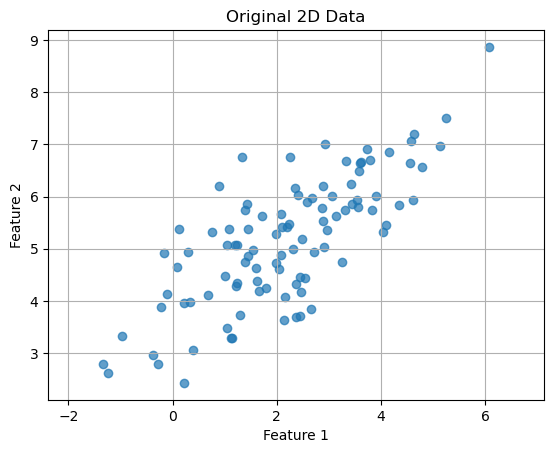

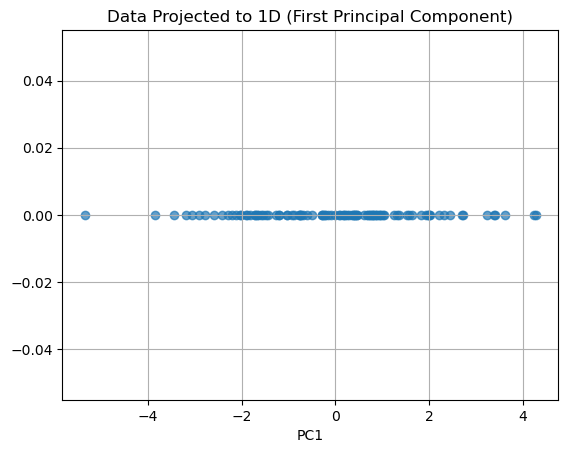

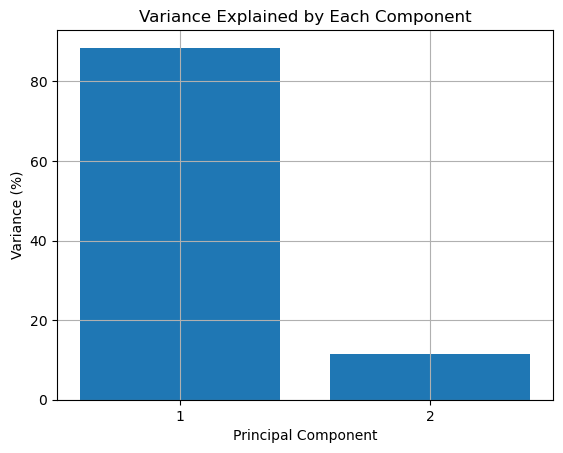

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a 2D dataset
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

# Step 2: Plot the original 2D data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()

# Step 3: Center the data (subtract the mean)
X_centered = X - np.mean(X, axis=0)

# Step 4: Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Step 5: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 6: Sort eigenvalues and eigenvectors in descending order
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Step 7: Project data onto the first principal component
PC1 = eigenvectors[:, 0]
X_1D = X_centered @ PC1

# Plot the 1D projection
plt.scatter(X_1D, np.zeros_like(X_1D), alpha=0.7)
plt.title("Data Projected to 1D (First Principal Component)")
plt.xlabel("PC1")
plt.grid(True)
plt.show()

# Step 8: Plot variance explained
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.bar([1, 2], explained_variance_ratio * 100)
plt.title("Variance Explained by Each Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance (%)")
plt.xticks([1, 2])
plt.grid(True)
plt.show()


Shape of X,y: (1797, 64)


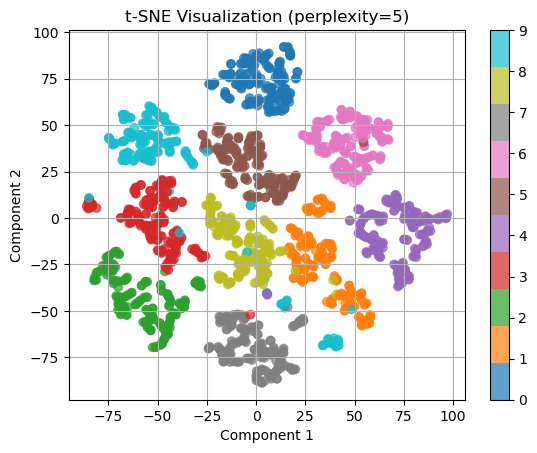

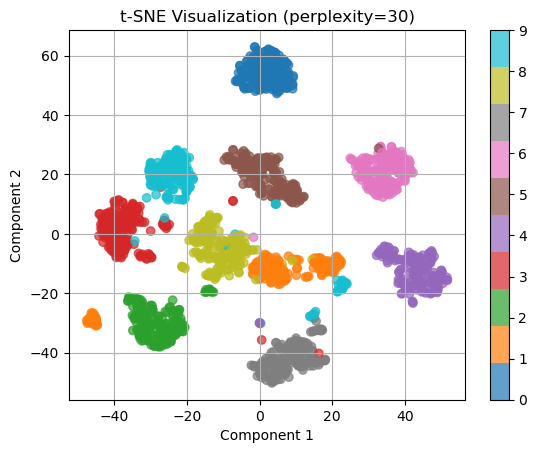

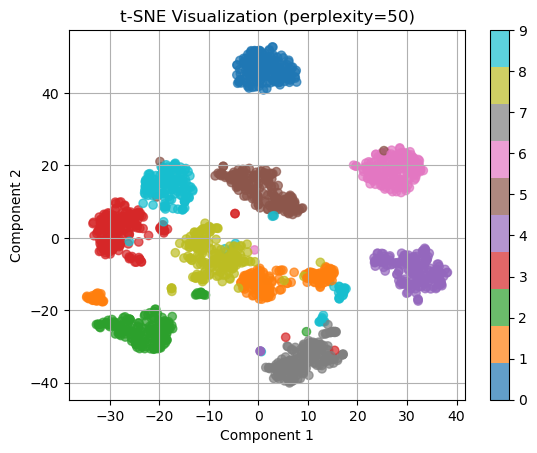

In [3]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Load digit dataset
digits = load_digits()
X = digits.data       # shape (1797, 64)
y = digits.target     # labels (0 to 9)

# Inspect the shape of X and y
print("Shape of X,y:", X.shape)

# Step 2: Apply t-SNE with different perplexity values
for perplexity in [5, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Step 3: Plot the 2D t-SNE embedding
    plt.figure()
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter)
    plt.title(f"t-SNE Visualization (perplexity={perplexity})")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()
